In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf._version_)

AttributeError: module 'tensorflow' has no attribute '_version_'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\SCIENCE\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [5]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
len(train_labels)

60000

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

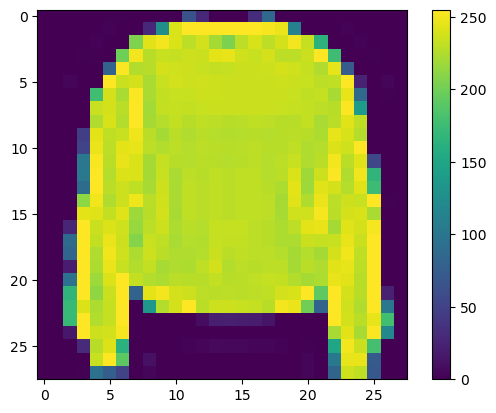

In [9]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images= train_images/255.0
test_images=test_images/255.0

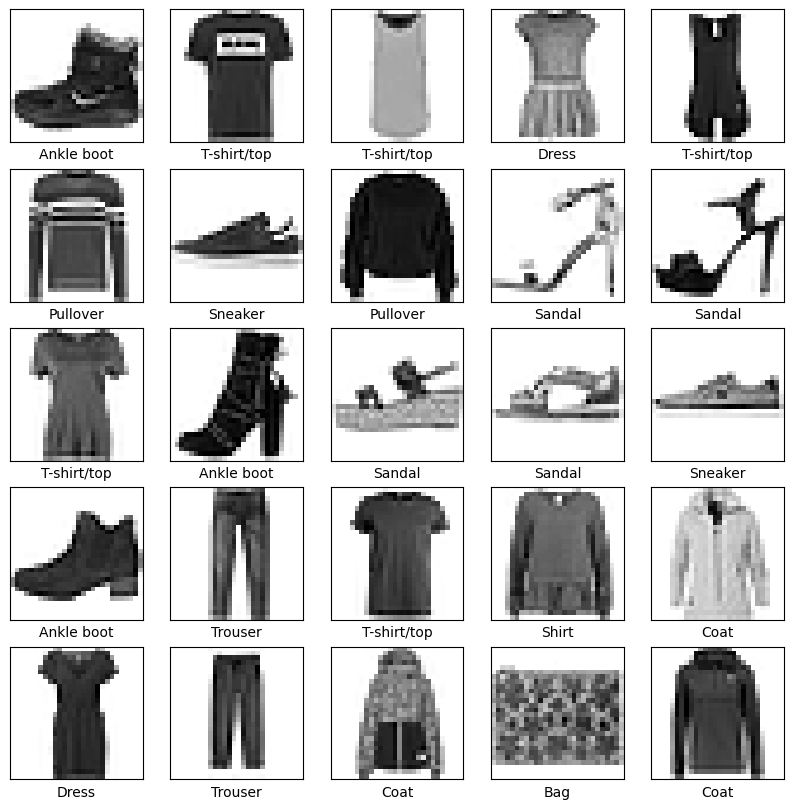

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [40]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [41]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [42]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0605 - accuracy: 0.6690
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6268 - accuracy: 0.7750
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5521 - accuracy: 0.8025
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5107 - accuracy: 0.8202
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4834 - accuracy: 0.8299
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4638 - accuracy: 0.8365
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4490 - accuracy: 0.8418
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4368 - accuracy: 0.8462
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4275 - accuracy: 0.8490
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [68]:
test_loss, test_acc =model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.4483 - accuracy: 0.8389
Test accuracy: 0.8389000296592712


In [69]:
pred=model.predict(test_images)
pred[0]

313/313 [==============================] - 1s 4ms/step


array([7.1119405e-07, 4.5611031e-08, 9.9447852e-06, 2.5995844e-06,
       7.4405257e-06, 1.8655726e-01, 1.5259355e-05, 2.5633013e-01,
       3.3021297e-03, 5.5377448e-01], dtype=float32)

In [70]:
np.argmax(pred[0])

9

In [72]:
test_labels[0]

9

In [82]:
def plot_image(i, pred_array, true_label, img):
    pred_array, true_label, img = pred_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label=np.argmax(pred_array)
    if predicted_label==true_label:
        color="blue"
    else:
            color="red"
            plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                           100*np.max(pred_array),
                                           class_names[true_label]),
                                           color=color)
def plot_value_array(i, pred_array, true_label):
    pred_array, true_label=pred_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), pred_array, color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(pred_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("green")                                 

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

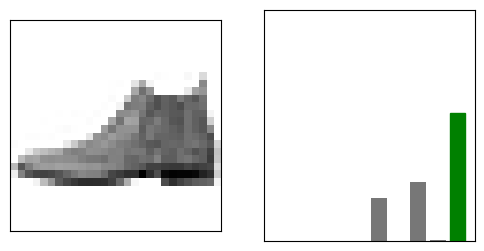

In [89]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

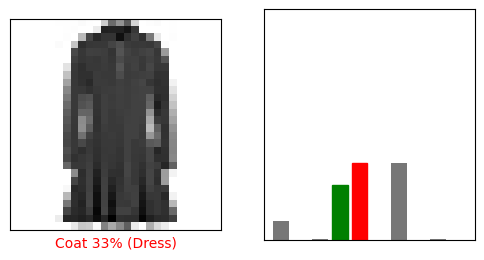

In [85]:
i=29
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

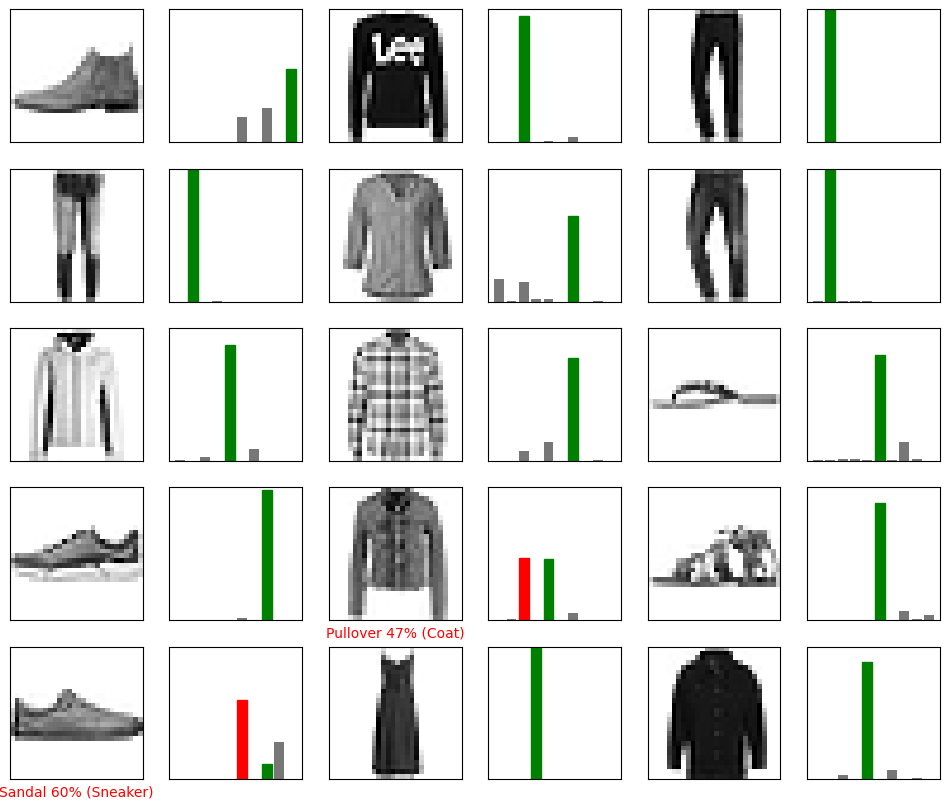

In [88]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [ ]:
import